In [1]:
from periodic_orbits import is_periodic, is_equilibrium, stg_coordinate, get_periodic_domains
from ode_functions import theta_from_param,ic_function, fun, convert_to_dict, get_parameter_node, get_ic_domain, plot_projections, plot_time_series, plot_phase_projection
# from ipynb.fs.full.ode_functions import get_param_distance, param_line, lower_double_id, upper_double_id, separate, generate_all_lines, check_list
from ipynb.fs.full.ode_functions import *
from periodic_orbits2 import check_sequence
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.decomposition import PCA

In [2]:
#decay rates
decays = {'d_p' : 1, 'd_mc' : 1, 'd_mn' : 1}

#hill coefficient
n = 90

#ode solver parameters
t0 = 0
tf = 100

In [3]:
tm1 = pd.read_csv("Parameter_datasets/P1TMBWnode1.csv", header = None)
tmparams1 = convert_to_dict(tm1)

tm2 = pd.read_csv("Parameter_datasets/P1TMBWnode2.csv", header = None)
tmparams2 = convert_to_dict(tm2)

tm3 = pd.read_csv("Parameter_datasets/P1TMBWnode3.csv", header = None)
tmparams3 = convert_to_dict(tm3)

tm4 = pd.read_csv("Parameter_datasets/P1TMBWnode4.csv", header = None)
tmparams4 = convert_to_dict(tm4)

tm5 = pd.read_csv("Parameter_datasets/P1TMBWnode5.csv", header = None)
tmparams5 = convert_to_dict(tm5)

tm6 = pd.read_csv("Parameter_datasets/P1TMBWnode6.csv", header = None)
tmparams6 = convert_to_dict(tm6)

tm7 = pd.read_csv("Parameter_datasets/P1TMBWnode7.csv", header = None)
tmparams7 = convert_to_dict(tm7)

tm8 = pd.read_csv("Parameter_datasets/P1TMBWnode8.csv", header = None)
tmparams8 = convert_to_dict(tm8)

tm9 = pd.read_csv("Parameter_datasets/P1TMBWnode9.csv", header = None)
tmparams9 = convert_to_dict(tm9)

tm10 = pd.read_csv("Parameter_datasets/P1TMBWnode10.csv", header = None)
tmparams10 = convert_to_dict(tm10)

tm11 = pd.read_csv("Parameter_datasets/P1TMBWnode11.csv", header = None)
tmparams11 = convert_to_dict(tm11)

tm12 = pd.read_csv("Parameter_datasets/P1TMBWnode12.csv", header = None)
tmparams12 = convert_to_dict(tm12)

tm13 = pd.read_csv("Parameter_datasets/P1TMBWnode13.csv", header = None)
tmparams13 = convert_to_dict(tm13)

tm14 = pd.read_csv("Parameter_datasets/P1TMBWnode14.csv", header = None)
tmparams14 = convert_to_dict(tm14)

tm15 = pd.read_csv("Parameter_datasets/P1TMBWnode15.csv", header = None)
tmparams15 = convert_to_dict(tm15)

tm16 = pd.read_csv("Parameter_datasets/P1TMBWnode16.csv", header = None)
tmparams16 = convert_to_dict(tm16)

tm17 = pd.read_csv("Parameter_datasets/P1TMBWnode17.csv", header = None)
tmparams17 = convert_to_dict(tm17)

tm18 = pd.read_csv("Parameter_datasets/P1TMBWnode18.csv", header = None)
tmparams18 = convert_to_dict(tm18)

tm19 = pd.read_csv("Parameter_datasets/P1TMBWnode19.csv", header = None)
tmparams19 = convert_to_dict(tm19)

tm20 = pd.read_csv("Parameter_datasets/P1TMBWnode20.csv", header = None)
tmparams20 = convert_to_dict(tm20)

tm_params = [tmparams1, tmparams2, tmparams3, tmparams4, tmparams5, tmparams6, tmparams7, tmparams8, tmparams9,
             tmparams10, tmparams11, tmparams12, tmparams13, tmparams14, tmparams15, tmparams16, tmparams17, 
             tmparams18, tmparams19, tmparams20]

In [4]:
tm_ICs = []
for i in range(10):
    tm_ICs.append(ic_function("011", tm_params[0]))#011 to avoid overshoot, and it is division point

In [44]:
tm_ICs2 = []
for i in range(10):
    tm_ICs2.append(ic_function("110", tm_params[0]))#110 to avoid overshoot, and it is division point

Fails for tm_params[1,4,8,16] 

In [45]:
tm_lengths = []#store orbit lengths, each set of 10 lengths corresponds to different ICs within same parameter
tm_sizes = []
for i in range(len(tm_params)):
    if i == 1 or i == 4 or i == 8 or i == 16:
        pass
    else:
        param = tm_params[i]
        theta = theta_from_param(param)
        for IC in tm_ICs2:
            sol = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,90,decays), [0,100], y0 = IC, method = 'BDF')
            output = get_periodic_domains(sol.y,theta,num_periods_to_verify = 2)
            tm_lengths.append(len(output))
            tm_sizes.append(lower_double_id(output))

/Users/Erika/Documents/Math/Research/periodic_orbits.py:96: UserWarning: get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = 2. The trajectory may not be periodic.
  warnings.warn('get_periodic_domains looked at all time points but did not verify a periodic sequence to desired verification level of num_periods_to_verify = {}. The trajectory may not be periodic.'.format(num_periods_to_verify))


Check (average) distances between working, not working nodes.

In [22]:
working = [0,2,3,5,6,7,9,10,11,12,13,14,15,17,18,19]
averages = []
for param_num in [1,4,8,16]:
    running_sum = 0
    for i in working:
        val = get_param_distance(tm_params[i],tm_params[param_num])
        running_sum = running_sum + val
    ave_val = running_sum/len(working)
    averages.append(ave_val)
    print('node', param_num, ave_val)
total_ave = sum(averages)/len(averages)
print('total average', total_ave)

node 1 1.9649710746567608
node 4 1.9136912448084
node 8 1.9176619265014834
node 16 2.0816564522378522
total average 1.9694951745511242


In [24]:
averages = []
for param_num in working:
    running_sum = 0
    for i in working:
        if i == param_num:
            pass
        else:
            val = get_param_distance(tm_params[i],tm_params[param_num])
            running_sum = running_sum + val
    ave_val = running_sum/len(working)
    averages.append(ave_val)
    print('node', param_num , ave_val)
total_ave = sum(averages)/len(averages)
print('total average', total_ave)

node 0 2.009247404423732
node 2 1.4484879639125325
node 3 2.0554261904462177
node 5 1.4715317403487946
node 6 1.7773990804945714
node 7 1.7945149048661917
node 9 1.5033311657278328
node 10 2.1990358865241806
node 11 1.3974870520292297
node 12 2.3151904057214523
node 13 1.3929331982231692
node 14 1.8259812285775971
node 15 2.603590990673484
node 17 1.4581476166578256
node 18 1.5409929923836805
node 19 1.7963488049030507
total average 1.7868529141195966


### PCA to compare clustering b/w working and broken nodes

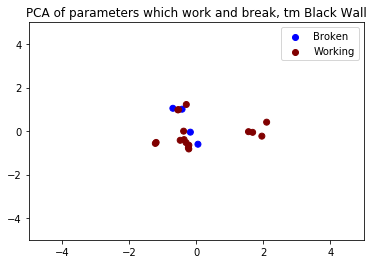

In [27]:
tm_param_colors = [0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0]

tmdf1 = pd.DataFrame.from_dict(tmparams1, orient = 'index')
tmdf1 = tmdf1.T
tmdf2 = pd.DataFrame.from_dict(tmparams2, orient = 'index')
tmdf2 = tmdf2.T
tmdf3 = pd.DataFrame.from_dict(tmparams3, orient = 'index')
tmdf3 = tmdf3.T
tmdf4 = pd.DataFrame.from_dict(tmparams4, orient = 'index')
tmdf4 = tmdf4.T
tmdf5 = pd.DataFrame.from_dict(tmparams5, orient = 'index')
tmdf5 = tmdf5.T
tmdf6 = pd.DataFrame.from_dict(tmparams6, orient = 'index')
tmdf6 = tmdf6.T
tmdf7 = pd.DataFrame.from_dict(tmparams7, orient = 'index')
tmdf7 = tmdf7.T
tmdf8 = pd.DataFrame.from_dict(tmparams8, orient = 'index')
tmdf8 = tmdf8.T
tmdf9 = pd.DataFrame.from_dict(tmparams9, orient = 'index')
tmdf9 = tmdf9.T
tmdf10 = pd.DataFrame.from_dict(tmparams10, orient = 'index')
tmdf10 = tmdf10.T
tmdf11 = pd.DataFrame.from_dict(tmparams11, orient = 'index')
tmdf11 = tmdf11.T
tmdf12 = pd.DataFrame.from_dict(tmparams12, orient = 'index')
tmdf12 = tmdf12.T
tmdf13 = pd.DataFrame.from_dict(tmparams13, orient = 'index')
tmdf13 = tmdf13.T
tmdf14 = pd.DataFrame.from_dict(tmparams14, orient = 'index')
tmdf14 = tmdf14.T
tmdf15 = pd.DataFrame.from_dict(tmparams15, orient = 'index')
tmdf15 = tmdf15.T
tmdf16 = pd.DataFrame.from_dict(tmparams16, orient = 'index')
tmdf16 = tmdf16.T
tmdf17 = pd.DataFrame.from_dict(tmparams17, orient = 'index')
tmdf17 = tmdf17.T
tmdf18 = pd.DataFrame.from_dict(tmparams18, orient = 'index')
tmdf18 = tmdf18.T
tmdf19 = pd.DataFrame.from_dict(tmparams19, orient = 'index')
tmdf19 = tmdf19.T
tmdf20 = pd.DataFrame.from_dict(tmparams20, orient = 'index')
tmdf20 = tmdf20.T

tm_param_data = pd.concat([tmdf1,tmdf2,tmdf3,tmdf4,tmdf5,tmdf6,tmdf7,tmdf8,tmdf9,tmdf10,
                          tmdf11,tmdf12,tmdf13,tmdf14,tmdf15,tmdf16,tmdf17,tmdf18,tmdf19,tmdf20])

tm_param_data['Working?'] = tm_param_colors
#------------------------------------------
pca = PCA(n_components = 2)
pca.fit(tm_param_data.iloc[:,0:17])
tm_pca = pca.transform(tm_param_data.iloc[:,0:17])

labels = tm_param_data.loc[:,'Working?']
label_colors = {0:'maroon',1:'blue'}
cvec = [label_colors[label] for label in labels]
plt.scatter(tm_pca[:,0],tm_pca[:,1], c = cvec)
plt.scatter(25,25,c = 'blue',label = 'Broken')#point at (25,25) just for labeling purposes
plt.scatter(25,25,c = 'maroon', label = 'Working')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('PCA of parameters which work and break, TM Black Wall')
plt.legend(loc = 'best')
# plt.savefig('pca_all_attributes.png')
plt.show()
plt.close()

No obvious pattern in PCA...

For now, ignore broken nodes and continue orbit length analysis for working ones.

In [46]:
#### observe orbit lengths (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]
for i in range(len(endpts)-1):
    if i < 1:
        print('top_param', i, ':', tm_lengths[endpts[i]:endpts[i+1]])
    elif i < 3:
        print('top_param', i+1, ':', tm_lengths[endpts[i]:endpts[i+1]])
    elif i < 6:
        print('top_param', i+2, ':', tm_lengths[endpts[i]:endpts[i+1]])
    elif i < 13:
        print('top_param', i+3, ':', tm_lengths[endpts[i]:endpts[i+1]])
    else:
        print('top_param', i+4, ':', tm_lengths[endpts[i]:endpts[i+1]])

top_param 0 : [8, 8, 8, 8, 8, 8, 8, 8, 8, 8]
top_param 2 : [80, 10, 9, 10, 9, 9, 72, 10, 9, 9]
top_param 3 : [56, 54, 150, 8, 54, 9, 9, 10, 10, 9]
top_param 5 : [48, 8, 8, 8, 16, 9, 16, 32, 7, 9]
top_param 6 : [8, 8, 8, 8, 108, 8, 8, 8, 8, 8]
top_param 7 : [8, 8, 8, 7, 7, 7, 7, 8, 8, 7]
top_param 9 : [8, 8, 7, 8, 70, 8, 8, 8, 70, 8]
top_param 10 : [10, 10, 9, 18, 90, 10, 10, 9, 10, 18]
top_param 11 : [8, 9, 18, 8, 9, 48, 48, 42, 8, 32]
top_param 12 : [128, 9, 130, 8, 135, 8, 10, 8, 36, 8]
top_param 13 : [9, 27, 9, 18, 17, 10, 36, 54, 36, 18]
top_param 14 : [8, 8, 8, 8, 8, 27, 10, 10, 9, 60]
top_param 15 : [96, 72, 9, 9, 9, 9, 9, 9, 88, 9]
top_param 17 : [84, 8, 8, 8, 7, 7, 8, 8, 8, 70]
top_param 18 : [9, 9, 18, 18, 10, 10, 9, 9, 9, 9]
top_param 19 : [9, 8, 27, 8, 9, 9, 9, 9, 8, 9]


In [47]:
#### observe orbit sizes (columns are different initial conditions)
endpts = [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]
for i in range(len(endpts)-1):
    if i < 1:
        print('top_param', i, ':', tm_sizes[endpts[i]:endpts[i+1]])
    elif i < 3:
        print('top_param', i+1, ':', tm_sizes[endpts[i]:endpts[i+1]])
    elif i < 6:
        print('top_param', i+2, ':', tm_sizes[endpts[i]:endpts[i+1]])
    elif i < 13:
        print('top_param', i+3, ':', tm_sizes[endpts[i]:endpts[i+1]])
    else:
        print('top_param', i+4, ':', tm_sizes[endpts[i]:endpts[i+1]])

top_param 0 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 2 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 3 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 5 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 6 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 7 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 9 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 10 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 11 : ['Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large', 'Large']
top_param 12 : ['Large', 'Large', 'Large', 'Large', '

Not very interesting to pursue linear connections or PCA analysis here (do PCA to have for combined PCA, though)... Perhaps sample parameter node more densely (as with no BW case) and see if other lengths appear.

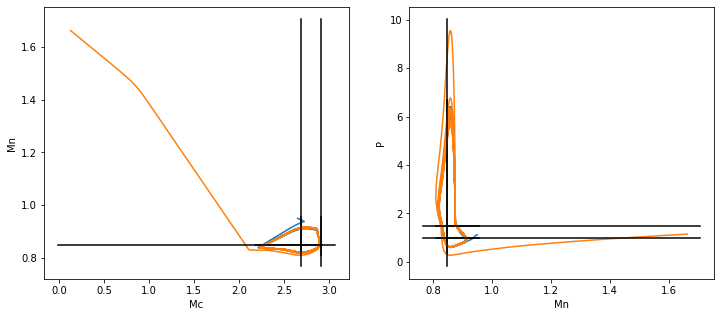

In [41]:
#plotting framework
param = tm_params[0]
sol0 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = tm_ICs[0], method = 'BDF')
sol1 = scipy.integrate.solve_ivp(lambda t,y: fun(t,y,param,n,decays), [0,tf], y0 = tm_ICs[1], method = 'BDF')

fig,(ax1,ax2) = plot_projections(sol0, param)
plot_projections(sol1, param, axs = (ax1, ax2))
# ax1.set_xlim(1,2.75)
# # ax1.set_ylim(0.3,0.8)
# ax2.set_xlim(0.6,1)
# ax2.set_ylim(0,8.5)

### PCA

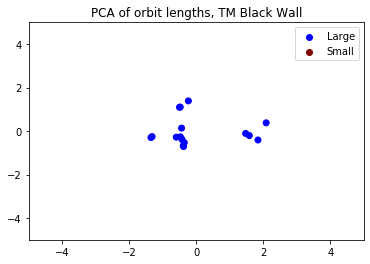

In [43]:
tm_param_colors = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

tmdf1 = pd.DataFrame.from_dict(tmparams1, orient = 'index')
tmdf1 = tmdf1.T
# tmdf2 = pd.DataFrame.from_dict(tmparams2, orient = 'index')
# tmdf2 = tmdf2.T
tmdf3 = pd.DataFrame.from_dict(tmparams3, orient = 'index')
tmdf3 = tmdf3.T
tmdf4 = pd.DataFrame.from_dict(tmparams4, orient = 'index')
tmdf4 = tmdf4.T
# tmdf5 = pd.DataFrame.from_dict(tmparams5, orient = 'index')
# tmdf5 = tmdf5.T
tmdf6 = pd.DataFrame.from_dict(tmparams6, orient = 'index')
tmdf6 = tmdf6.T
tmdf7 = pd.DataFrame.from_dict(tmparams7, orient = 'index')
tmdf7 = tmdf7.T
tmdf8 = pd.DataFrame.from_dict(tmparams8, orient = 'index')
tmdf8 = tmdf8.T
# tmdf9 = pd.DataFrame.from_dict(tmparams9, orient = 'index')
# tmdf9 = tmdf9.T
tmdf10 = pd.DataFrame.from_dict(tmparams10, orient = 'index')
tmdf10 = tmdf10.T
tmdf11 = pd.DataFrame.from_dict(tmparams11, orient = 'index')
tmdf11 = tmdf11.T
tmdf12 = pd.DataFrame.from_dict(tmparams12, orient = 'index')
tmdf12 = tmdf12.T
tmdf13 = pd.DataFrame.from_dict(tmparams13, orient = 'index')
tmdf13 = tmdf13.T
tmdf14 = pd.DataFrame.from_dict(tmparams14, orient = 'index')
tmdf14 = tmdf14.T
tmdf15 = pd.DataFrame.from_dict(tmparams15, orient = 'index')
tmdf15 = tmdf15.T
tmdf16 = pd.DataFrame.from_dict(tmparams16, orient = 'index')
tmdf16 = tmdf16.T
# tmdf17 = pd.DataFrame.from_dict(tmparams17, orient = 'index')
# tmdf17 = tmdf17.T
tmdf18 = pd.DataFrame.from_dict(tmparams18, orient = 'index')
tmdf18 = tmdf18.T
tmdf19 = pd.DataFrame.from_dict(tmparams19, orient = 'index')
tmdf19 = tmdf19.T
tmdf20 = pd.DataFrame.from_dict(tmparams20, orient = 'index')
tmdf20 = tmdf20.T

tm_param_data = pd.concat([tmdf1,tmdf3,tmdf4,tmdf6,tmdf7,tmdf8,tmdf10,
                          tmdf11,tmdf12,tmdf13,tmdf14,tmdf15,tmdf16,tmdf18,tmdf19,tmdf20])

tm_param_data['OrbitLength'] = tm_param_colors
#------------------------------------------
pca = PCA(n_components = 2)
pca.fit(tm_param_data.iloc[:,0:17])
tm_pca = pca.transform(tm_param_data.iloc[:,0:17])

labels = tm_param_data.loc[:,'OrbitLength']
label_colors = {0:'maroon',1:'blue'}
cvec = [label_colors[label] for label in labels]
plt.scatter(tm_pca[:,0],tm_pca[:,1], c = cvec)
plt.scatter(25,25,c = 'blue',label = 'Large')#point at (25,25) just for labeling purposes
plt.scatter(25,25,c = 'maroon', label = 'Small')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('PCA of orbit lengths, TM Black Wall')
plt.legend(loc = 'best')
# plt.savefig('pca_all_attributes.png')
plt.show()
plt.close()